In [59]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt



In [12]:
name = ['movie_id','title','genres']   # 칼럼 이름
# 파일 불러오기
movies = pd.read_csv('movies.dat', sep='::', header=None, names=name)

print(movies.info())                      # 읽어온 데이터의 정보 확인
print(movies.head())                      # 맨 앞의 5개 데이터 보기
print("전체 영화의 갯수 : ",len(movies))    # 읽어온 데이터의 갯수


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 3 columns):
movie_id    10681 non-null int64
title       10681 non-null object
genres      10681 non-null object
dtypes: int64(1), object(2)
memory usage: 250.4+ KB
None
   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
전체 영화의 갯수 :  10681


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [18]:
genres = []     # 추출된 장르를 저장할 리스트
for genre in movies['genres'] :
    for g in genre.split('|') :      # | 를 기준으로 여러개의 장르 구분
        genres.append(g)             # 리스트에 추가]

print('전체 장르 수 : ',len(genres))   #전체 장르 수 :  6408


전체 장르 수 :  21564


In [19]:
# 중복되지 않은 유일한 장르의 갯수 추출
genres_unique = pd.unique(genres)
print('유일한 장르 수 :',len(genres_unique))
print(genres_unique)


유일한 장르 수 : 20
['Adventure' 'Animation' 'Children' 'Comedy' 'Fantasy' 'Romance' 'Drama'
 'Action' 'Crime' 'Thriller' 'Horror' 'Mystery' 'Sci-Fi' 'IMAX'
 'Documentary' 'War' 'Musical' 'Film-Noir' 'Western' '(no genres listed)']


In [38]:
type(genres_unique)

numpy.ndarray

In [39]:
zero = np.zeros(((len(movies),len(genres_unique))))
print(zero)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [41]:
df = DataFrame(zero, columns=genres_unique)

In [52]:
for n,i in enumerate(movies.genres):
    df.ix[n, i.split("|")]=1

In [50]:
df.ix[0,['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']] = 1

In [51]:
print(df)

       Adventure  Animation  Children  Comedy  Fantasy  Romance  Drama  \
0            1.0        1.0       1.0     1.0      1.0      0.0    0.0   
1            0.0        0.0       0.0     0.0      0.0      0.0    0.0   
2            0.0        0.0       0.0     0.0      0.0      0.0    0.0   
3            0.0        0.0       0.0     0.0      0.0      0.0    0.0   
4            0.0        0.0       0.0     0.0      0.0      0.0    0.0   
5            0.0        0.0       0.0     0.0      0.0      0.0    0.0   
6            0.0        0.0       0.0     0.0      0.0      0.0    0.0   
7            0.0        0.0       0.0     0.0      0.0      0.0    0.0   
8            0.0        0.0       0.0     0.0      0.0      0.0    0.0   
9            0.0        0.0       0.0     0.0      0.0      0.0    0.0   
10           0.0        0.0       0.0     0.0      0.0      0.0    0.0   
11           0.0        0.0       0.0     0.0      0.0      0.0    0.0   
12           0.0        0.0       0.0 

In [53]:
arr = df.T
print(arr)

                    0      1      2      3      4      5      6      7      \
Adventure             1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0   
Animation             1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Children              1.0    1.0    0.0    0.0    0.0    0.0    0.0    1.0   
Comedy                1.0    0.0    1.0    1.0    1.0    0.0    1.0    0.0   
Fantasy               1.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
Romance               0.0    0.0    1.0    1.0    0.0    0.0    1.0    0.0   
Drama                 0.0    0.0    0.0    1.0    0.0    0.0    0.0    0.0   
Action                0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
Crime                 0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
Thriller              0.0    0.0    0.0    0.0    0.0    1.0    0.0    0.0   
Horror                0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
Mystery               0.0    0.0    0.0    0.0    0.0    0.0    

In [56]:
word_counter = arr.sum(axis=1)  # 행 단위 합계
print("word_counter")
print(word_counter)

word_counter
Adventure             1025.0
Animation              286.0
Children               528.0
Comedy                3703.0
Fantasy                543.0
Romance               1685.0
Drama                 5339.0
Action                1473.0
Crime                 1118.0
Thriller              1706.0
Horror                1013.0
Mystery                509.0
Sci-Fi                 754.0
IMAX                    29.0
Documentary            482.0
War                    511.0
Musical                436.0
Film-Noir              148.0
Western                275.0
(no genres listed)       1.0
dtype: float64


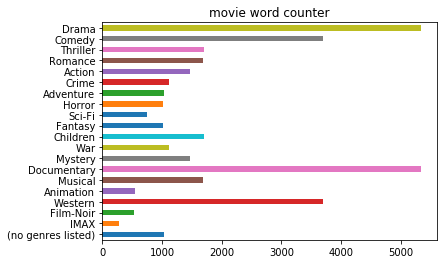

In [60]:
word_counter.plot(kind='barh',title='movie word counter')

word_counter.sort_values().plot(kind='barh',title='movie word counter')
plt.show()